<font size="3">  **Importing the Libraries** </font>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.metrics import accuracy_score

<font size="3"> **Data Collection** </font>

**Loading the Data from CSV file to a PANDAS Dataframe**

In [8]:
wine_data = pd.read_csv('/Users/aarsh/Desktop/Wine Quality Prediction /Data Set/winequality-red.csv')

**Checking Number of Rows & Columns in the Dataframe**

In [9]:
wine_data.shape

(1599, 12)

**Checking the first 5 Rows of the Dataframe**

In [10]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Checking Missing Values in Each Column**

In [11]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<font size="3"> **Data Analysis & Visualization** </font>

**Statistical Measures of the Data**

In [12]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Checking Number of Labelled (Quality) Values** 

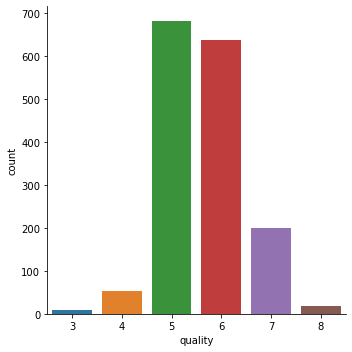

In [13]:
sns.catplot(x = 'quality', data = wine_data, kind = 'count')

**Checking Labelled Values (Quality) with other Parameteres (11) to see what kind of Cor-Relation exists**

**Volatile Acidity Vs Quality**

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

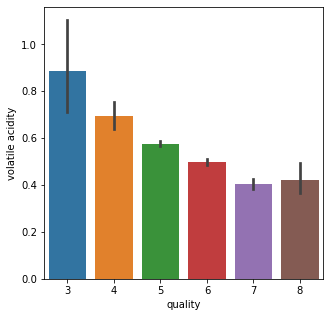

In [14]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data)

**Citric Acid Vs Quality** 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

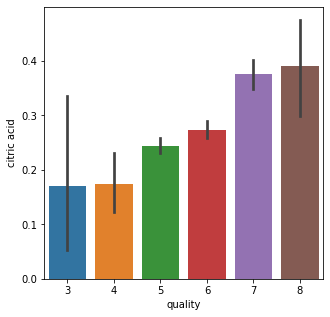

In [15]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data)

**Similarly, we can check for all the 11 Parameters**

**Finding Cor-Relation between All Columns (Parameters) to Quality (Labelled)**

In [16]:
correlation = wine_data.corr()

**Creating a HEAT MAP to understand the cor-relation between Columns(Features) giving us a Cor-Relation Matrix**

<AxesSubplot:>

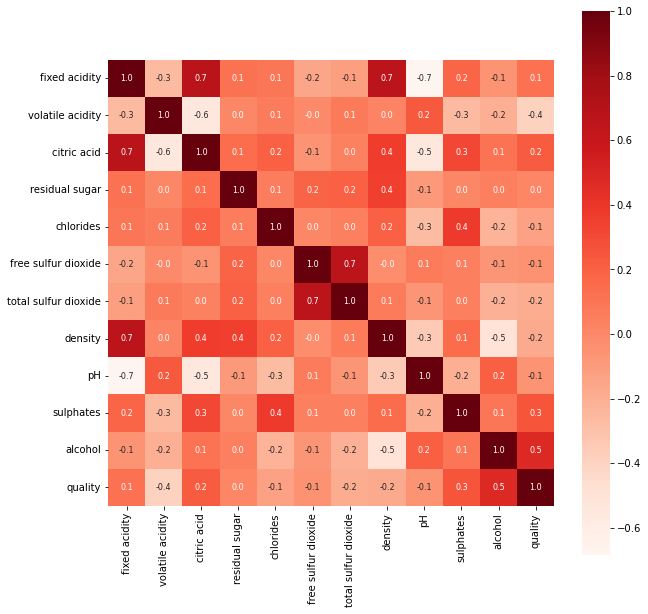

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Reds')

<font size="3"> **Data Pre-Processing** </font>

**Seperating the Data Features (Columns) & Label (Quality)**

**Dropping the Label (Quaity)**

In [18]:
x = wine_data.drop('quality', axis = 1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

**Label Binazrization** 

**Converting Quality Values (2,3,4,5,6,7,8) to just Binary Values (Label)(Good & Bad) as (1 & 0)(7,8 being Good Quality as (1) & 2,3,4,5,6 being Bad as (0))**

In [19]:
y = wine_data['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


**Splitting Data into Test & Train**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

**Checking if Test & Train Split was successful for Labeled Data (Quality), where test is 20% of original**

In [21]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


<font size="3"> **Training Model : Random Forest Classifier** </font>

In [22]:
model = RandomForestClassifier()

In [23]:
model.fit(x_train, y_train)

RandomForestClassifier()

**Model Evaluation**

**Accuracy on Test Data**

In [24]:
x_test_pred = model.predict(x_test)
test_data_acc = accuracy_score(x_test_pred, y_test)

In [25]:
print('Accuracy Score:', test_data_acc)

Accuracy Score: 0.928125


<font size="3"> **Building a Predicitve System** </font>

**Taking Random Data from our DataSet to check the Prediciton System**

In [26]:
input_data = (7.3, 0.65, 0.0, 1.2, 0.065, 15.0, 21.0, 0.9946, 3.39, 0.47, 10.0)

**Changing the Input Data to a Numpy Array (for processing list ot tuples)**

In [27]:
input_data_as_numpy_array = np.asarray(input_data)

**Reshaping the data , as we are predicitng the Label(Quality) for One Instance**

In [28]:
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

In [29]:
prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[1]
Good Quality Wine


/Users/aarsh/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
